# Regression using Scikit Learn

### Explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models.

### Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Create Data
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

In [3]:
x

array([ 0.35281047,  0.79431716,  1.62431903,  2.59103578,  3.23065446,
        3.375973  ,  4.47573197,  4.96972856,  5.69364194,  6.51069113,
        7.17166586,  8.14799756,  8.72363612,  9.31004929, 10.08877265])

In [4]:
y

array([ 0.43770571,  0.99517935,  1.24877201,  0.98630796,  0.36408873,
        0.07512287, -0.16081   , -0.05233879,  0.3187423 ,  1.53763897,
        1.82595557,  2.31966323,  2.08031157,  1.81942995,  1.21213026])

In [5]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=0)

### You can use this function to help you visualize the dataset by plotting a scatterplot of the data points  in the training and test sets.

Visualise using a plot categorised by training data and test data.

In [6]:
def part1_scatter():
    import matplotlib.pyplot as plt
    get_ipython().magic('matplotlib notebook')
    plt.figure()
    plt.scatter(X_train, y_train, label='trainingdata')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

<IPython.core.display.Javascript object>


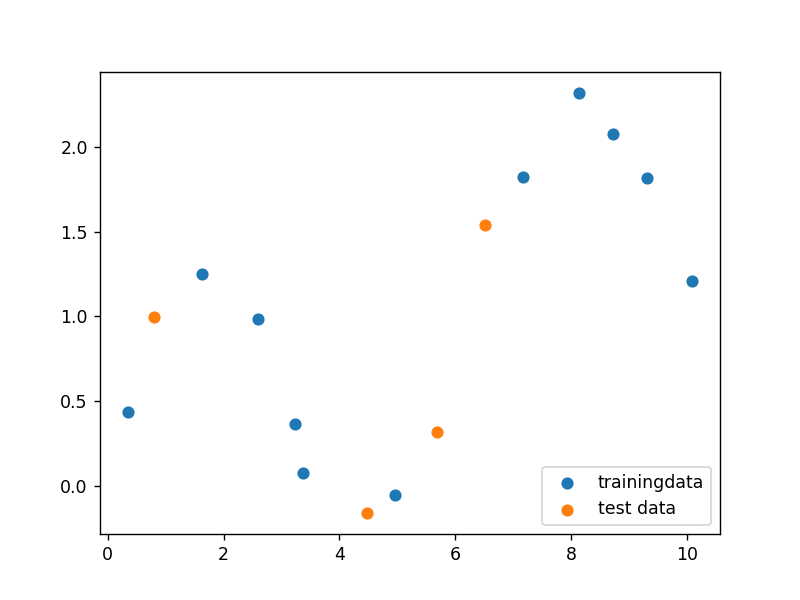

In [7]:
part1_scatter()

### Write a function that fits a polynomial Linear
Regression model on the *training data* `X_train` for degrees 1, 3, 6, and 9.  
(Use PolynomialFeatures in
sklearn.preprocessing to create the polynomial features and then fit a linear regression model)
• For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`)
and store this in a numpy array.
• The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

In [8]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    result = np.zeros((4,100))
    
    # Your code here
    for i, degree in enumerate([1,3,6,9]):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_train.reshape(11,1))
        linreg = LinearRegression().fit(X_poly, y_train)
        y = linreg.predict(poly.fit_transform(np.linspace(0,10,100).reshape(100,1)))
        result[i,:] = y
    return result # Return your answer

In [9]:
answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

In [10]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    get_ipython().magic('matplotlib notebook')
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

<IPython.core.display.Javascript object>


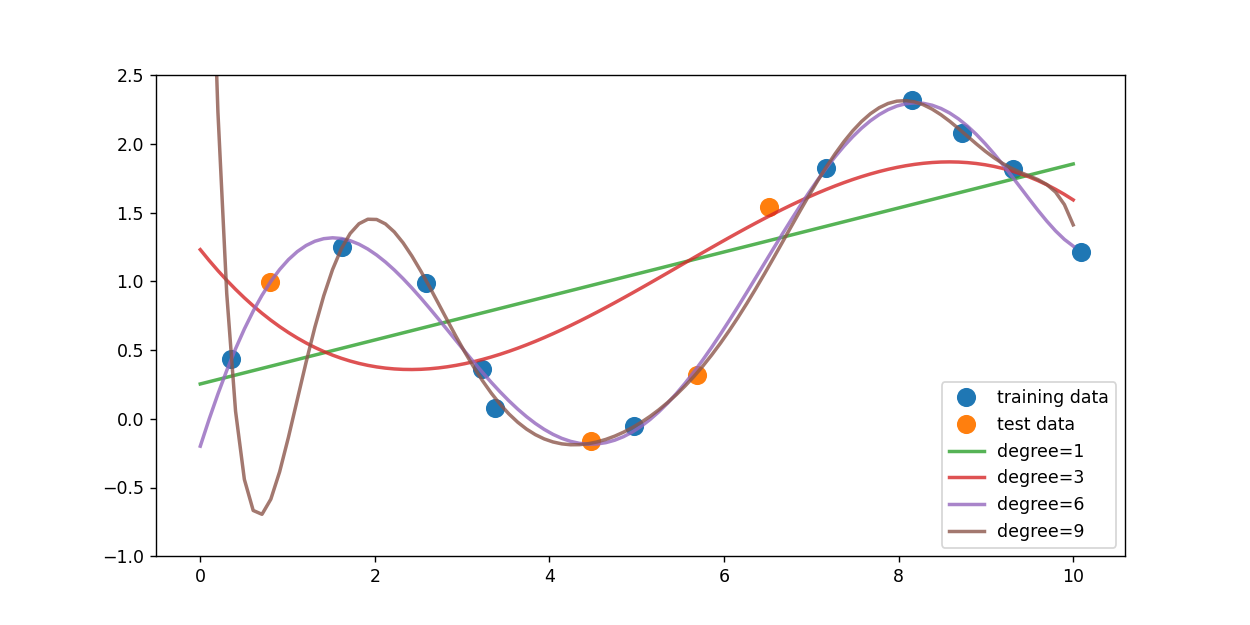

In [11]:
plot_one(answer_one())

### Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. 

For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.
  *This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [15]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score
    
    r2_train = np.zeros(10)
    r2_test = np.zeros(10)
    
    # Your code here
    for i in range(10):
        poly = PolynomialFeatures(degree=i)
        
        # Train and score x_train
        X_poly = poly.fit_transform(X_train.reshape(11,1))
        linreg = LinearRegression().fit(X_poly, y_train)        
        r2_train[i] = linreg.score(X_poly, y_train);
        
        # Score x_test (do not train)
        X_test_poly = poly.fit_transform(X_test.reshape(4,1))
        r2_test[i] = linreg.score(X_test_poly, y_test)
        
    return (r2_train, r2_test)

In [16]:
answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.6324795 , -0.64524777]))

### Based on the $R^2$ scores from above (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

Note: there may be multiple correct solutions to this.
 
 (Hint: Try plotting the $R^2$ scores from above to visualize the relationship between degree level and $R^2$)

 *This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*


In [17]:
def answer_three():
    
    r2_scores = answer_two()
    df = pd.DataFrame({'training_score':r2_scores[0], 'test_score':r2_scores[1]})
    df['diff'] = df['training_score'] - df['test_score']
    
    df = df.sort_values(['diff'])
    good_gen = df.index[0]
    
    df = df.sort_values(['diff'], ascending = False)
    overfitting = df.index[0]
    
    df = df.sort_values(['training_score'])
    underfitting = df.index[0]
    
    return (underfitting,overfitting,good_gen)

In [18]:
answer_three()

(0, 9, 6)